In [206]:
# import packages
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab as pl
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from random import *

In [36]:
dataframe = pd.DataFrame()
row_data = {}

count = 1
with open('poea_dataset.txt') as in_file:
    for line in in_file:
        if line != '\n':
            if count == 1:
                row_data['Name'] = line.strip('\n').strip()
            if count == 2: 
                row_data['Address'] = line.strip('\n').strip()
            if count in [3,4,5,6,7,8]:
                col = line.split(':')[0].strip()
                val = line.split(':')[1].strip('\n').strip()
                row_data[col] = val
            count += 1
        else:
            if row_data['Status'] == 'Valid License':
                row_data['Negative Status'] = False
            else:
                row_data['Negative Status'] = True
            
            if row_data['Email Address'] in ['', 'None', 'NA']:
                row_data['Email Missing'] = True
            else:
                row_data['Email Missing'] = False
                
            if row_data['Official Representative'] in ['', 'NA']:
                row_data['Representative Missing'] = True
            else:
                row_data['Representative Missing'] = False
            
            if row_data['Tel No/s'] in ['', 'NA']:
                row_data['Telephone Missing'] = True
            else:
                row_data['Telephone Missing'] = False
            
            if row_data['Website'] in ['', 'None', 'NA', 'N/A', 'NONE', 'http']:
                row_data['Website Missing'] = True
            else:
                row_data['Website Missing'] = False
            
            if row_data['Address'] == 'NO ADDRESS':
                row_data['Address Missing'] = True
            else:
                row_data['Address Missing'] = False
                
            if (row_data['Email Missing'] == True
                or row_data['Representative Missing'] == True
                or row_data['Telephone Missing'] == True
                or row_data['Website Missing'] == True
                or row_data['Address Missing']
               ):
                row_data['Any Missing'] = True
            else:
                row_data['Any Missing'] = False
                
            new_row = pd.DataFrame(data = row_data, index = [0])
            dataframe = dataframe.append(new_row, ignore_index = True)
            count = 1
            row_data = {}

In [37]:
dataframe

,Address,Address Missing,Any Missing,Email Address,Email Missing,License Validity,Name,Negative Status,Official Representative,Representative Missing,Status,Tel No/s,Telephone Missing,Website,Website Missing
0,R 20 G/F & 33B 2/F MIDLAND PLAZA HOTEL M ADRIA...,False,True,brilliant_minds1015@yahoo.com,False,9/11/2017 to 9/11/2019,1015 BRILLIANT MINDS INC Private Employment Ag...,False,ANITA A COBER,False,Valid License,(02) 2522338 / 2515100,False,None,True
1,R602 DOÃƒâ€˜A F SYJUCO BLG 1872 REMEDIOS COR T...,False,True,CARGOFLEET@MARC-SHIPS.COM,False,11/4/2011 to 11/3/2015,1022 MARITIME SERVICES CORPORATION Manning Agency,True,,True,Ceased Operations,5362997 5360831,False,None,True
2,"2F & 3F, 1523-1527 M.H. DEL PILAR ST ERMITA, M...",False,False,tenthstorypai@yahoo.com,False,4/2/2016 to 4/1/2020,"10TH STORY PLACEMENT AGENCY, INC. Private Empl...",False,MR ALFONSO UY NG,False,Valid License,3531581,False,www.10thstory.com,False
3,2F&3FCORA ROSE BRIDALS CUENCA GONZAGA JUAN BAC...,False,True,,True,3/28/2001 to 3/28/2003,168 PLACEMENT CORPORATION Private Employment A...,True,MA LISA G LOPEZ,False,Delisted,4336267,False,,True
4,"2FLR 118 J DEL ROSARIO ST., DONA PETRA SUBD TU...",False,True,168yelufa_hr@yahoo.com,False,1/28/2008 to 1/28/2012,168 YE LU FA INTERNATIONAL MANPOWER AND PROMOT...,True,JAMES T. ONG LOPEZ,False,Delisted,516-8893,False,NA,True
5,"3/F ANGELA GAW BLG.1170 SN ANDRES ST. MALATE, ...",False,True,FIRSTAKCES_MANPOWER@HOTMAIL.COM,False,12/23/2006 to 6/23/2007,1ST AKCES MANPOWER INC (FORMERLY CHAYAN MAN PR...,True,NORMANDY P. REYES,False,Cancelled,5243869,False,NA,True
6,"3F, JLC BLDG, NO. 8 N. RAMIREZ STREET DON MANU...",False,False,1stdynamicpersonnel@gmail.com,False,4/8/2014 to 4/8/2018,1ST DYNAMIC PERSONNEL RESOURCES INC. Private E...,False,CATHERINE LIANA Z CHUA,False,Valid License,(02) 416-1848,False,www.1stdynamicpersonnel.com,False
7,31A GB BLDG MONTEVERDE ST DAVAO CITY DAVAO CIT...,False,True,NA,True,8/18/2006 to 8/18/2007,1ST FILIPINO OVERSEAS RECRUITMENT AGENCY (FORA...,True,LORENZO ANG,False,Delisted,,True,NA,True
8,"U16,12,24,25,47,48,49&50 CITYLAND COND 128 PIO...",False,True,firstnorthern_international@yahoo.com,False,12/30/2017 to 12/29/2021,1ST NORTHERN INTERNATIONAL PLACEMENT INC Priva...,False,ANCHIE A SIBAL,False,Valid License,6381981/6381982,False,None,True
9,"U14&15, DON GRACIANO BLG, 1180 E RODRIGUEZ SR ...",False,False,info@2000miles.org / 2000miles.pac@gmail.com,False,9/28/2015 to 9/27/2019,"2000 MILES PLACEMENT AGENCY, INC. (FOR:GEOSONS...",False,EMILIA S POBLETE,False,Valid License,4148717/ 4168229/ 6615388/ 09209503504,False,www.2000miles.org,False


In [38]:
dataframe.to_csv(path_or_buf = 'data.csv', sep=',', index = False, header = True)

In [8]:
status_list = Counter(dataframe['Status'])

In [9]:
status_list

Counter({'Cancelled': 823,
         'Cash Bond Withdrawn': 3,
         'Ceased Operations': 11,
         'Delisted': 1197,
         'Denied Renewal': 25,
         'Expired': 35,
         'Forever Banned': 167,
         'Inactive': 86,
         'Preventive Suspension': 1,
         'Revoked': 11,
         'Suspended': 32,
         'Suspended (Document Processing)': 19,
         'Valid License': 1256})

In [10]:
dict(status_list)

{'Cancelled': 823,
 'Cash Bond Withdrawn': 3,
 'Ceased Operations': 11,
 'Delisted': 1197,
 'Denied Renewal': 25,
 'Expired': 35,
 'Forever Banned': 167,
 'Inactive': 86,
 'Preventive Suspension': 1,
 'Revoked': 11,
 'Suspended': 32,
 'Suspended (Document Processing)': 19,
 'Valid License': 1256}

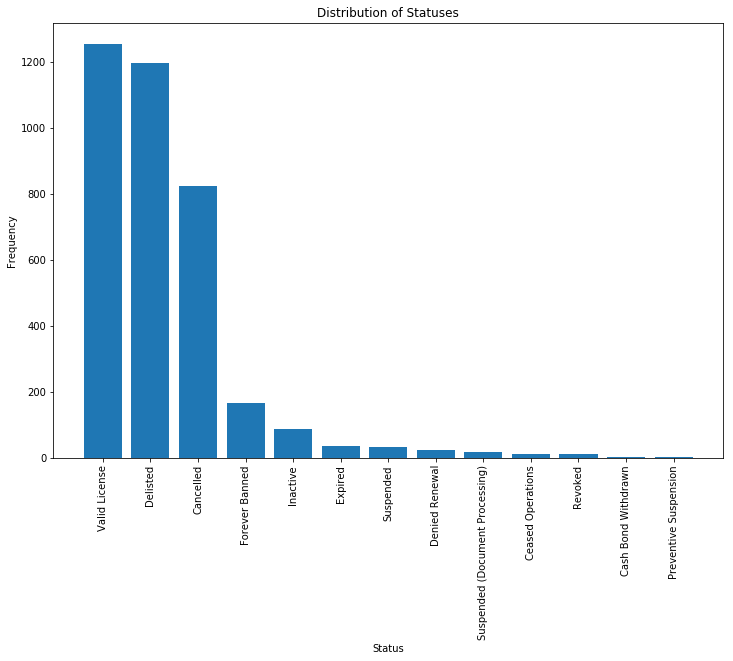

In [94]:
lists = [(k, status_list[k]) for k in sorted(dict(status_list), key = dict(status_list).get, reverse = True)]

category, height = zip(*lists)
x_position = np.arange(len(status_list)

fig, ax = plt.subplots(figsize = (12,8))
plt.title('Distribution of Statuses')
plt.ylabel('Frequency')
plt.xlabel('Status')

# Create bars
plt.bar(x_position, height)
 
# Create names on the x-axis
plt.xticks(x_position, category, rotation = 'vertical')
 
# Show graphic
plt.show()

In [ ]:
email_list = Counter(dataframe['Email Address'])
rep_list = Counter(dataframe['Official Representative'])
telnum_list = Counter(dataframe['Tel No/s'])
web_list = Counter(dataframe['Website'])

# Sort dictionaries by value in descending order, keep top ten items
top_email_list = dict(sorted(email_list.items(), key=lambda x:x[1], reverse=True)[:10])
top_rep_list = dict(sorted(rep_list.items(), key=lambda x:x[1], reverse=True)[:10])
top_telnum_list = dict(sorted(telnum_list.items(), key=lambda x:x[1], reverse=True)[:10])
top_web_list = dict(sorted(web_list.items(), key=lambda x:x[1], reverse=True)[:10])


# Count amount of invalid emails/representative names/telephone numbers/websites
email_sum = 0
rep_sum = 0
telnum_sum = 0
web_sum = 0

for val in top_email_list:
    if '@' not in val:
        email_sum += top_email_list[val]
        
for val in top_rep_list:
    if val == '' or val == 'NA' or val == 'N/A' or val == 'None':
        rep_sum += top_rep_list[val]

for val in top_telnum_list:
    if val == '' or val == 'NA' or val == 'N/A' or val == 'None':
        telnum_sum += top_telnum_list[val]

for val in top_web_list:
    if val == '' or val == 'NA' or val == 'N/A' or val == 'None' or val == 'NONE' or val == 'http':
        web_sum += top_web_list[val]


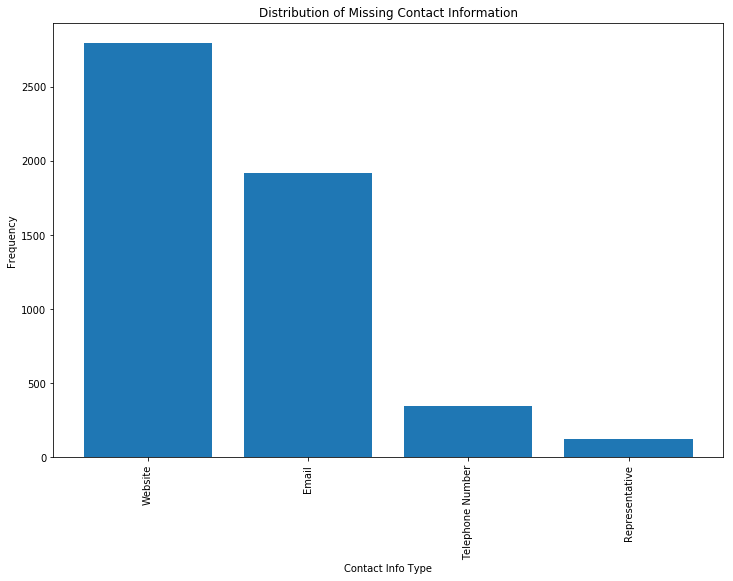

In [104]:
sums = {'email_sum': email_sum, 'rep_sum': rep_sum, 'telnum_sum': telnum_sum, 'web_sum': web_sum}

lists = [(k, sums[k]) for k in sorted(sums, key = sums.get, reverse = True)]

category, height = zip(*lists)
x_position = np.arange(len(sums))

fig, ax = plt.subplots(figsize = (12,8))
plt.title('Distribution of Missing Contact Information')
plt.ylabel('Frequency')
plt.xlabel('Contact Info Type')

# Create bars
plt.bar(x_position, height)
 
# Create names on the x-axis
plt.xticks(x_position, ['Website', 'Email', 'Telephone Number', 'Representative'], rotation = 'vertical')
 
# Show graphic
plt.show()

In [7]:
address_sum = dict(Counter(dataframe['Address']))
sorted_address_sum = [(k, address_sum[k]) for k in sorted(address_sum, key = address_sum.get, reverse = True)]
address_df = pd.DataFrame(data = sorted_address_sum, columns = ['Address', 'Frequency'])
address_df

,Address,Frequency
0,NO ADDRESS,4
1,"RCM BLDG 1418 SAN MARCELINO ST ERMITA, MANILA",3
2,"RM 202 2F KIMVI BLDG 1191 MA OROSA ST ERMITA, ...",2
3,ST.JUDE BLDG 1020 MALVAR ST COR MODESTO MALATE...,2
4,ARL BLDG GLORIA 111 CASANOVA DRIVE T.SORA Q.C.,2
5,"SUITE 18-A,18F RAMON MAGSAYSAY CENTER 1680 ROX...",2
6,#16 JUPITER COR ANTARES ST BEL-AIR VILLAGE MAKATI,2
7,S501 5F 1377 A MABINI COR STA MONICA ST ERMITA...,2
8,FERROS BLDG 176 SALCEDO ST LEGASPI VILL MAKATI,2
9,GF 2F 5F 6F 8F 9F & 10F BSM HOUSE 1965 L GUINT...,2


In [39]:
dataframe.corr()

,Address Missing,Any Missing,Email Missing,Negative Status,Representative Missing,Telephone Missing,Website Missing
Address Missing,1.000000,0.018074,0.031586,-0.045781,0.182025,0.101890,0.018491
Any Missing,0.018074,1.000000,0.572231,0.511781,0.099296,0.177391,0.977450
Email Missing,0.031586,0.572231,1.000000,0.678280,-0.006677,0.304417,0.573898
Negative Status,-0.045781,0.511781,0.678280,1.000000,0.046058,0.200874,0.510636
Representative Missing,0.182025,0.099296,-0.006677,0.046058,1.000000,-0.011307,0.025106
Telephone Missing,0.101890,0.177391,0.304417,0.200874,-0.011307,1.000000,0.181484
Website Missing,0.018491,0.977450,0.573898,0.510636,0.025106,0.181484,1.000000


In [45]:
# perform logistic regression

train_cols = ['Address Missing', 'Email Missing', 'Representative Missing', 'Website Missing', 'Telephone Missing']

logit = sm.Logit(dataframe['Negative Status'], dataframe[train_cols])

# fit the model
result = logit.fit()

         Current function value: 0.402281
         Iterations: 35


C:\Users\megan\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
# results of logistic regression
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:        Negative Status   No. Observations:                 3666
Model:                          Logit   Df Residuals:                     3661
Method:                           MLE   Df Model:                            4
Date:                Sun, 25 Mar 2018   Pseudo R-squ.:                  0.3741
Time:                        18:08:18   Log-Likelihood:                -1474.8
converged:                      False   LL-Null:                       -2356.3
                                        LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Address Missing          -23.0250   6264.237     -0.004      0.997   -1.23e+04    1.23e+04
Email Missing              3.7058      0.156     23.792      0.000       3.400       4.011
Repr

In [49]:
# look at the confidence interval of each coeffecient
print (result.conf_int())

                                   0             1
Address Missing        -12300.704088  12254.654045
Email Missing               3.400478      4.011027
Representative Missing      0.253662      1.308007
Website Missing            -0.481758     -0.210770
Telephone Missing          -0.617333      0.643693


In [51]:
# odds ratios
print (np.exp(result.params))

Address Missing           1.000830e-10
Email Missing             4.068064e+01
Representative Missing    2.183294e+00
Website Missing           7.073256e-01
Telephone Missing         1.013267e+00
dtype: float64


In [53]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                             2.5%      97.5%            OR
Address Missing          0.000000        inf  1.000830e-10
Email Missing           29.978427  55.203526  4.068064e+01
Representative Missing   1.288736   3.698796  2.183294e+00
Website Missing          0.617696   0.809960  7.073256e-01
Telephone Missing        0.539381   1.903498  1.013267e+00


C:\Users\megan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


Above we can see that:

1) Address Missing and Telephone missing are NOT significant indicators of negative status (odds ratio confidence interval contians 1, p > 0.9 for both)

2) Email, Representative, and Website Missing are all significant (p < 0.001 in all cases)

3) If a labor agent has a missing Email address, they are 40 times as likely to have a negative status than if they did have an email address

4) If a labor agent has a missing representative, they are twice as likely to have a negative status than if they did have a representative

5) interestingly, if a labor agent has a missing website, they are 30% LESS likely to have a negative status than if they DID have an email. We hypothesize that this indicates that skeevy labor agents may try to seem more legitiamate by having a website and luring in more unsuspecting laborers by looking technological.

In [59]:
# remove insignificant factors from above, namely Address Missing and Telephone Missing
train_cols = ['Email Missing', 'Representative Missing', 'Website Missing']

logit = sm.Logit(dataframe['Negative Status'], dataframe[train_cols])

# fit the model
result = logit.fit()

# results of logistic regression
print (result.summary())

print('\n------Odds Ratios and their confidendence intervals------------ \n')

# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.406641
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Negative Status   No. Observations:                 3666
Model:                          Logit   Df Residuals:                     3663
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Mar 2018   Pseudo R-squ.:                  0.3673
Time:                        18:51:58   Log-Likelihood:                -1490.7
converged:                       True   LL-Null:                       -2356.3
                                        LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Email Missing              3.6388      0.142     25.658      0.000       3.361      

Now we can see a better model above, with entirely significant variables:

1) all values have p < 0.05, however Representative Missing is the least significant (p = 0.048)

2) A labor agent with a missing email is 38 times more likely to have a negative status (all other variables held constant)

3) a labor agent with a missing representative is 1.7 times more likely to have a negative status (all other variables held constant)

4) a labor agent with a missing website is 0.7 times as likely to have a negative status (all other variables held constant) -- meaning they are MORE LIKELY TO BE NEGATIVE IF THEY HAVE A WEBSITE. As we say above, this could indicate that illegitiamte labor brokers try to seem more legitamte by having a website.

Why did our numbers not really change after we removed variables form the model? = Low covariance between all variables, see below

In [56]:
dataframe.cov()

,Address Missing,Any Missing,Email Missing,Negative Status,Representative Missing,Telephone Missing,Website Missing
Address Missing,0.001090,0.000251,0.000521,-0.000717,0.001057,0.000988,0.000260
Any Missing,0.000251,0.177269,0.120357,0.102275,0.007350,0.021923,0.175385
Email Missing,0.000521,0.120357,0.249555,0.160828,-0.000586,0.044638,0.122179
Negative Status,-0.000717,0.102275,0.160828,0.225289,0.003843,0.027986,0.103291
Representative Missing,0.001057,0.007350,-0.000586,0.003843,0.030905,-0.000583,0.001881
Telephone Missing,0.000988,0.021923,0.044638,0.027986,-0.000583,0.086160,0.022702
Website Missing,0.000260,0.175385,0.122179,0.103291,0.001881,0.022702,0.181619


In [135]:
# make a new dataframe where all null values are replaces with None

testing_dataframe = pd.DataFrame()
row_data = {}

count = 1
with open('poea_dataset.txt') as in_file:
    for line in in_file:
        if line != '\n':
            if count == 1:
                row_data['Name'] = line.strip('\n').strip()
            if count == 2: 
                row_data['Address'] = line.strip('\n').strip()
            if count in [3,4,5,6,7,8]:
                col = line.split(':')[0].strip()
                val = line.split(':')[1].strip('\n').strip()
                row_data[col] = val
            count += 1
        else:
            if row_data['Status'] == 'Valid License':
                row_data['Negative Status'] = False
            else:
                row_data['Negative Status'] = True
            
            if row_data['Email Address'] in ['', 'None', 'NA']:
                row_data['Email Missing'] = True
                row_data['Email Address'] = None
            else:
                row_data['Email Missing'] = False
                
            if row_data['Official Representative'] in ['', 'NA', 'N/A']:
                row_data['Representative Missing'] = True
                row_data['Official Representative'] = None
            else:
                row_data['Representative Missing'] = False
            
            if row_data['Tel No/s'] in ['', 'NA', 'FOR INSTALLATION']:
                row_data['Telephone Missing'] = True
                row_data['Tel No/s'] = None
            else:
                row_data['Telephone Missing'] = False
            
            if row_data['Website'] in ['', 'None', 'NA', 'N/A', 'NONE', 'http']:
                row_data['Website Missing'] = True
                row_data['Website'] = None
            else:
                row_data['Website Missing'] = False
            
            if row_data['Address'] == 'NO ADDRESS':
                row_data['Address Missing'] = True
                row_data['Address'] = None
            else:
                row_data['Address Missing'] = False
                
            new_row = pd.DataFrame(data = row_data, index = [0])
            testing_dataframe = testing_dataframe.append(new_row, ignore_index = True)
            count = 1
            row_data = {}

In [259]:
testing_dataframe.to_csv(path_or_buf = 'data_null values all changed to None.csv', sep=',', index = False, header = True)

In [136]:
testing_dataframe

,Address,Address Missing,Email Address,Email Missing,License Validity,Name,Negative Status,Official Representative,Representative Missing,Status,Tel No/s,Telephone Missing,Website,Website Missing
0,R 20 G/F & 33B 2/F MIDLAND PLAZA HOTEL M ADRIA...,False,brilliant_minds1015@yahoo.com,False,9/11/2017 to 9/11/2019,1015 BRILLIANT MINDS INC Private Employment Ag...,False,ANITA A COBER,False,Valid License,(02) 2522338 / 2515100,False,None,True
1,R602 DOÃƒâ€˜A F SYJUCO BLG 1872 REMEDIOS COR T...,False,CARGOFLEET@MARC-SHIPS.COM,False,11/4/2011 to 11/3/2015,1022 MARITIME SERVICES CORPORATION Manning Agency,True,None,True,Ceased Operations,5362997 5360831,False,None,True
2,"2F & 3F, 1523-1527 M.H. DEL PILAR ST ERMITA, M...",False,tenthstorypai@yahoo.com,False,4/2/2016 to 4/1/2020,"10TH STORY PLACEMENT AGENCY, INC. Private Empl...",False,MR ALFONSO UY NG,False,Valid License,3531581,False,www.10thstory.com,False
3,2F&3FCORA ROSE BRIDALS CUENCA GONZAGA JUAN BAC...,False,None,True,3/28/2001 to 3/28/2003,168 PLACEMENT CORPORATION Private Employment A...,True,MA LISA G LOPEZ,False,Delisted,4336267,False,None,True
4,"2FLR 118 J DEL ROSARIO ST., DONA PETRA SUBD TU...",False,168yelufa_hr@yahoo.com,False,1/28/2008 to 1/28/2012,168 YE LU FA INTERNATIONAL MANPOWER AND PROMOT...,True,JAMES T. ONG LOPEZ,False,Delisted,516-8893,False,None,True
5,"3/F ANGELA GAW BLG.1170 SN ANDRES ST. MALATE, ...",False,FIRSTAKCES_MANPOWER@HOTMAIL.COM,False,12/23/2006 to 6/23/2007,1ST AKCES MANPOWER INC (FORMERLY CHAYAN MAN PR...,True,NORMANDY P. REYES,False,Cancelled,5243869,False,None,True
6,"3F, JLC BLDG, NO. 8 N. RAMIREZ STREET DON MANU...",False,1stdynamicpersonnel@gmail.com,False,4/8/2014 to 4/8/2018,1ST DYNAMIC PERSONNEL RESOURCES INC. Private E...,False,CATHERINE LIANA Z CHUA,False,Valid License,(02) 416-1848,False,www.1stdynamicpersonnel.com,False
7,31A GB BLDG MONTEVERDE ST DAVAO CITY DAVAO CIT...,False,None,True,8/18/2006 to 8/18/2007,1ST FILIPINO OVERSEAS RECRUITMENT AGENCY (FORA...,True,LORENZO ANG,False,Delisted,None,True,None,True
8,"U16,12,24,25,47,48,49&50 CITYLAND COND 128 PIO...",False,firstnorthern_international@yahoo.com,False,12/30/2017 to 12/29/2021,1ST NORTHERN INTERNATIONAL PLACEMENT INC Priva...,False,ANCHIE A SIBAL,False,Valid License,6381981/6381982,False,None,True
9,"U14&15, DON GRACIANO BLG, 1180 E RODRIGUEZ SR ...",False,info@2000miles.org / 2000miles.pac@gmail.com,False,9/28/2015 to 9/27/2019,"2000 MILES PLACEMENT AGENCY, INC. (FOR:GEOSONS...",False,EMILIA S POBLETE,False,Valid License,4148717/ 4168229/ 6615388/ 09209503504,False,www.2000miles.org,False


Now we want to find out how many brokers are using the same representative, address, phone number, website, or email and see if these repeated values are correlated with violations

In [137]:
address_sum = dict(Counter(testing_dataframe['Address']))
sorted_address_sum = [(k, address_sum[k]) for k in sorted(address_sum, key = address_sum.get, reverse = True)]
address_df = pd.DataFrame(data = sorted_address_sum, columns = ['Address', 'Frequency'])
address_frequency_sum = dict(Counter(address_df['Frequency']))
print('Number of addresses with more than one broker associated \n\nkey = number of brokers at an address \nvalue = how many address have [key] number of brokers associate with it')
print('NOTE: The 4 value is missing addresses')
address_frequency_sum

Number of addresses with more than one broker associated 

key = number of brokers at an address 
value = how many address have [key] number of brokers associate with it
NOTE: The 4 value is missing addresses


{1: 3579, 2: 40, 3: 1, 4: 1}

In [138]:
phone_sum = dict(Counter(testing_dataframe['Tel No/s']))
sorted_phone_sum = [(k, phone_sum[k]) for k in sorted(phone_sum, key = phone_sum.get, reverse = True)]
phone_df = pd.DataFrame(data = sorted_phone_sum, columns = ['Phone Number', 'Frequency'])
phone_frequency_sum = dict(Counter(phone_df['Frequency']))
print('Number of phone numbers with more than one broker associated \n\nkey = number of brokers with the phone number \nvalue = how many phone numbers have [key] number of brokers associate with it')
print('NOTE: The 353 value is missing phone numbers')
phone_frequency_sum

Number of phone numbers with more than one broker associated 

key = number of brokers with the phone number 
value = how many phone numbers have [key] number of brokers associate with it
NOTE: The 353 value is missing phone numbers


{1: 3219, 2: 45, 4: 1, 353: 1}

In [139]:
reps_sum = dict(Counter(testing_dataframe['Official Representative']))
sorted_reps_sum = [(k, reps_sum[k]) for k in sorted(reps_sum, key = reps_sum.get, reverse = True)]
reps_df = pd.DataFrame(data = sorted_reps_sum, columns = ['Representative', 'Frequency'])
reps_frequency_sum = dict(Counter(reps_df['Frequency']))
print('Number of representatives with more than one broker associated \n\nkey = number of brokers with the representative \nvalue = how many representatives have [key] number of brokers associate with it')
print('NOTE: The 121 value is missing representatives')
reps_frequency_sum

Number of representatives with more than one broker associated 

key = number of brokers with the representative 
value = how many representatives have [key] number of brokers associate with it
NOTE: The 121 value is missing representatives


{1: 3369, 2: 65, 3: 7, 4: 1, 5: 3, 6: 1, 121: 1}

In [140]:
website_sum = dict(Counter(testing_dataframe['Website']))
sorted_website_sum = [(k, website_sum[k]) for k in sorted(website_sum, key = website_sum.get, reverse = True)]
website_df = pd.DataFrame(data = sorted_website_sum, columns = ['Website', 'Frequency'])
website_frequency_sum = dict(Counter(website_df['Frequency']))
print('Number of websites with more than one broker associated \n\nkey = number of brokers with the website \nvalue = how many websites have [key] number of brokers associate with it')
print('NOTE: The 2792 value is missing websites')
website_frequency_sum

Number of websites with more than one broker associated 

key = number of brokers with the website 
value = how many websites have [key] number of brokers associate with it
NOTE: The 2792 value is missing websites


{1: 846, 2: 11, 3: 2, 2792: 1}

In [141]:
email_sum = dict(Counter(testing_dataframe['Email Address']))
sorted_email_sum = [(k, email_sum[k]) for k in sorted(email_sum, key = email_sum.get, reverse = True)]
email_df = pd.DataFrame(data = sorted_email_sum, columns = ['Email', 'Frequency'])
email_frequency_sum = dict(Counter(email_df['Frequency']))
print('Number of email addresses with more than one broker associated \n\nkey = number of brokers with the email address \nvalue = how many email addresses have [key] number of brokers associate with it')
print('NOTE: The 1916 value is missing email addresses')
email_frequency_sum

Number of email addresses with more than one broker associated 

key = number of brokers with the email address 
value = how many email addresses have [key] number of brokers associate with it
NOTE: The 1916 value is missing email addresses


{1: 1706, 2: 22, 1916: 1}

In [142]:
# add indicators for addresses, phone numbers, representatives with multiple brokers

repeated_rep = []
repeated_address = []
repeated_phone = []
repeated_website = []
repeated_email = []
for index, row in testing_dataframe.iterrows():
    if reps_sum[row['Official Representative']] > 1 and row['Official Representative'] is not None:
        repeated_rep += [True]
    else:
        repeated_rep += [False]
    if address_sum[row['Address']] > 1 and row['Address'] is not None:
        repeated_address += [True]
    else:
        repeated_address += [False]
    if phone_sum[row['Tel No/s']] > 1 and row['Tel No/s'] is not None:
        repeated_phone += [True]
    else:
        repeated_phone += [False]
    if website_sum[row['Website']] > 1 and row['Website'] is not None:
        repeated_website += [True]
    else:
        repeated_website += [False]
    if email_sum[row['Email Address']] > 1 and row['Email Address'] is not None:
        repeated_email += [True]
    else:
        repeated_email += [False]

In [143]:
testing_dataframe['Repeated Address'] = repeated_address
testing_dataframe['Repeated Phone Number'] = repeated_phone
testing_dataframe['Repeated Representative'] = repeated_rep
testing_dataframe['Repeated Website'] = repeated_website
testing_dataframe['Repeated Email Address'] = repeated_email

In [144]:
testing_dataframe

,Address,Address Missing,Email Address,Email Missing,License Validity,Name,Negative Status,Official Representative,Representative Missing,Status,Tel No/s,Telephone Missing,Website,Website Missing,Repeated Address,Repeated Phone Number,Repeated Representative,Repeated Website,Repeated Email Address
0,R 20 G/F & 33B 2/F MIDLAND PLAZA HOTEL M ADRIA...,False,brilliant_minds1015@yahoo.com,False,9/11/2017 to 9/11/2019,1015 BRILLIANT MINDS INC Private Employment Ag...,False,ANITA A COBER,False,Valid License,(02) 2522338 / 2515100,False,None,True,False,False,False,False,False
1,R602 DOÃƒâ€˜A F SYJUCO BLG 1872 REMEDIOS COR T...,False,CARGOFLEET@MARC-SHIPS.COM,False,11/4/2011 to 11/3/2015,1022 MARITIME SERVICES CORPORATION Manning Agency,True,None,True,Ceased Operations,5362997 5360831,False,None,True,False,False,False,False,False
2,"2F & 3F, 1523-1527 M.H. DEL PILAR ST ERMITA, M...",False,tenthstorypai@yahoo.com,False,4/2/2016 to 4/1/2020,"10TH STORY PLACEMENT AGENCY, INC. Private Empl...",False,MR ALFONSO UY NG,False,Valid License,3531581,False,www.10thstory.com,False,False,False,False,False,False
3,2F&3FCORA ROSE BRIDALS CUENCA GONZAGA JUAN BAC...,False,None,True,3/28/2001 to 3/28/2003,168 PLACEMENT CORPORATION Private Employment A...,True,MA LISA G LOPEZ,False,Delisted,4336267,False,None,True,False,False,False,False,False
4,"2FLR 118 J DEL ROSARIO ST., DONA PETRA SUBD TU...",False,168yelufa_hr@yahoo.com,False,1/28/2008 to 1/28/2012,168 YE LU FA INTERNATIONAL MANPOWER AND PROMOT...,True,JAMES T. ONG LOPEZ,False,Delisted,516-8893,False,None,True,False,False,False,False,False
5,"3/F ANGELA GAW BLG.1170 SN ANDRES ST. MALATE, ...",False,FIRSTAKCES_MANPOWER@HOTMAIL.COM,False,12/23/2006 to 6/23/2007,1ST AKCES MANPOWER INC (FORMERLY CHAYAN MAN PR...,True,NORMANDY P. REYES,False,Cancelled,5243869,False,None,True,False,False,False,False,False
6,"3F, JLC BLDG, NO. 8 N. RAMIREZ STREET DON MANU...",False,1stdynamicpersonnel@gmail.com,False,4/8/2014 to 4/8/2018,1ST DYNAMIC PERSONNEL RESOURCES INC. Private E...,False,CATHERINE LIANA Z CHUA,False,Valid License,(02) 416-1848,False,www.1stdynamicpersonnel.com,False,False,False,False,False,False
7,31A GB BLDG MONTEVERDE ST DAVAO CITY DAVAO CIT...,False,None,True,8/18/2006 to 8/18/2007,1ST FILIPINO OVERSEAS RECRUITMENT AGENCY (FORA...,True,LORENZO ANG,False,Delisted,None,True,None,True,False,False,False,False,False
8,"U16,12,24,25,47,48,49&50 CITYLAND COND 128 PIO...",False,firstnorthern_international@yahoo.com,False,12/30/2017 to 12/29/2021,1ST NORTHERN INTERNATIONAL PLACEMENT INC Priva...,False,ANCHIE A SIBAL,False,Valid License,6381981/6381982,False,None,True,False,False,False,False,False
9,"U14&15, DON GRACIANO BLG, 1180 E RODRIGUEZ SR ...",False,info@2000miles.org / 2000miles.pac@gmail.com,False,9/28/2015 to 9/27/2019,"2000 MILES PLACEMENT AGENCY, INC. (FOR:GEOSONS...",False,EMILIA S POBLETE,False,Valid License,4148717/ 4168229/ 6615388/ 09209503504,False,www.2000miles.org,False,False,False,False,False,False


In [145]:
testing_dataframe.to_csv(path_or_buf = 'data_where all null values changed to None_indicators for repeated values added.csv', sep=',', index = False, header = True)

In [146]:
testing_dataframe.corr()

,Address Missing,Email Missing,Negative Status,Representative Missing,Telephone Missing,Website Missing,Repeated Address,Repeated Phone Number,Repeated Representative,Repeated Website,Repeated Email Address
Address Missing,1.000000,0.031586,-0.045781,0.178890,0.101250,0.018491,-0.005030,-0.005361,-0.007422,-0.002899,-0.003643
Email Missing,0.031586,1.000000,0.678280,-0.012960,0.300851,0.573898,0.016964,0.009922,0.017921,-0.091797,-0.115327
Negative Status,-0.045781,0.678280,1.000000,0.043290,0.202524,0.510636,0.040325,0.026201,-0.018016,-0.048901,-0.025997
Representative Missing,0.178890,-0.012960,0.043290,1.000000,-0.008546,0.024535,0.033467,0.037649,-0.041489,-0.016208,-0.020363
Telephone Missing,0.101250,0.300851,0.202524,-0.008546,1.000000,0.178291,-0.006167,-0.052952,0.021856,-0.028637,-0.027486
Website Missing,0.018491,0.573898,0.510636,0.024535,0.178291,1.000000,0.016301,0.017862,-0.009104,-0.156801,-0.061785
Repeated Address,-0.005030,0.016964,0.040325,0.033467,-0.006167,0.016301,1.000000,0.682995,0.188836,0.323655,0.505250
Repeated Phone Number,-0.005361,0.009922,0.026201,0.037649,-0.052952,0.017862,0.682995,1.000000,0.197671,0.302931,0.457558
Repeated Representative,-0.007422,0.017921,-0.018016,-0.041489,0.021856,-0.009104,0.188836,0.197671,1.000000,0.097546,0.139289
Repeated Website,-0.002899,-0.091797,-0.048901,-0.016208,-0.028637,-0.156801,0.323655,0.302931,0.097546,1.000000,0.450695


In [147]:
# perform logistic regression

train_cols = ['Email Missing', 'Representative Missing', 'Website Missing',
              'Repeated Address',
              'Repeated Phone Number',
              'Repeated Representative',
              'Repeated Website',
              'Repeated Email Address']

logit = sm.Logit(testing_dataframe['Negative Status'], testing_dataframe[train_cols])

# fit the model
result = logit.fit()

# results of logistic regression
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.402332
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Negative Status   No. Observations:                 3666
Model:                          Logit   Df Residuals:                     3658
Method:                           MLE   Df Model:                            7
Date:                Sun, 01 Apr 2018   Pseudo R-squ.:                  0.3740
Time:                        20:06:58   Log-Likelihood:                -1475.0
converged:                       True   LL-Null:                       -2356.3
                                        LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Email Missing               3.7194      0.145     25.685      0.000       3.436   

Repeated Address, Repeated Phone Number, Repeated Website, and Repeated Email Address are all insignificant (p > 0.05)

In [148]:
# perform logistic regression

train_cols = ['Email Missing', 'Representative Missing', 'Website Missing', 'Repeated Representative']

logit = sm.Logit(testing_dataframe['Negative Status'], testing_dataframe[train_cols])

# fit the model
result = logit.fit()

# results of logistic regression
print (result.summary())

print('\n------Odds Ratios and their confidendence intervals------------ \n')

# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.403540
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Negative Status   No. Observations:                 3666
Model:                          Logit   Df Residuals:                     3662
Method:                           MLE   Df Model:                            3
Date:                Sun, 01 Apr 2018   Pseudo R-squ.:                  0.3722
Time:                        20:07:15   Log-Likelihood:                -1479.4
converged:                       True   LL-Null:                       -2356.3
                                        LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Email Missing               3.6928      0.144     25.689      0.000       3.411   

If a broker had an official representative that is the official representative of another broker, they are significantly LESS likely to have a negative status. A broker with a repeated representative is 70% less likely to have a negative status than a broker with a unique representative (p < 0.001). This could indicate that representatives of legitimate labor agents gain a good reputation, so they work for multiple agents. Or it could mean that illegitimate labor brokers don't bother with finding a good representative, they just use anyone, so they likely do not have a representative of another broker. HOWEVER, the R-squared value of the model when adding the repeated representative factor only increases by less than 0.01 (from 0.3673 to 0.3719), meaning adding this extra information does not really improve our predictions. Additionally, this would be a difficult factor to use in the field when Verite is trying to detect brokers who ma be nefarious. It would be much easier to see if they do not list an official representative, it would be much harder to see if they are using a representative that is also representing another labor agent. So, we should not use this factor, and we should stick with the 3-dimensional model above.

In [ ]:
'''
Below I am trying to find ownership groups with the greatest number of violations by clustering. I do not think it worked.
'''

In [220]:
# find ownership groups with greatest volume of labor violations
# let's try clustering
# we will make feature vectors with the addresses/reps/phone numbers/emails/websites above that have more than
# one violation

cols = [i for i in address_sum if (address_sum[i] > 1 and i is not None)] + [i for i in reps_sum if (reps_sum[i] > 1 and i is not None)] + [i for i in phone_sum if (phone_sum[i] > 1 and i is not None)] + [i for i in email_sum if (email_sum[i] > 1 and i is not None)] + [i for i in website_sum if (website_sum[i] > 1 and i is not None)]

feature_vectors = pd.DataFrame(columns = cols + ['Negative Status'])

In [221]:
for index, row in dataframe.iterrows():
    fv_data = [(colitem in list(row.values)) for colitem in cols]
    # if the labor broker has contacct information that is associated with more than one broker, add it to feature vectors
    # we only care about "ownerships groups" that are associated with more than one labor broker
    if True in fv_data:
        fv_data += [row['Negative Status']]
        new_row = pd.DataFrame([fv_data], columns = cols + ['Negative Status'])
        feature_vectors = feature_vectors.append(new_row, ignore_index = True)

In [222]:
feature_vectors

,"RM 202 2F KIMVI BLDG 1191 MA OROSA ST ERMITA, MANILA","ST.JUDE BLDG 1020 MALVAR ST COR MODESTO MALATE, MANILA",ARL BLDG GLORIA 111 CASANOVA DRIVE T.SORA Q.C.,"SUITE 18-A,18F RAMON MAGSAYSAY CENTER 1680 ROXAS B MANILA",#16 JUPITER COR ANTARES ST BEL-AIR VILLAGE MAKATI,"S501 5F 1377 A MABINI COR STA MONICA ST ERMITA, MANILA",FERROS BLDG 176 SALCEDO ST LEGASPI VILL MAKATI,"GF 2F 5F 6F 8F 9F & 10F BSM HOUSE 1965 L GUINTO ST MALATE, MANILA","G/F, GMC PLAZA BLDG., M.J. CUENCO AVE COR. LEGASPI CEBU",SABAS ALMEDA BLDG 505 A.FLORES ERMITA MANILA,...,www.cfsharp.com,www.salvtug.com,www.sms.mits-dcl.com.ph,www.tsmphil.com.ph,FB Acct,www.scanmar.com.ph,www.uplines.net,www.vintex.com.ph,www.walcrew.com.ph,Negative Status
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [223]:
len(feature_vectors)

279

In [224]:
# now that we have feature vectors, let's see if we can cluster the data
# first find the optimal number of clusters with the silhouette score

# define function to get silhouette scores

def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Number of Clusters for Feature Vectors')
    plt.grid(axis = 'both')
    plt.show()
    print (list(s).index(max(list(s))), 'clusters best fit the data')

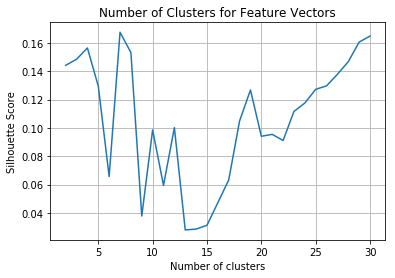

7 clusters best fit the data


In [225]:
sc_evaluate_clusters(feature_vectors.as_matrix(), 30)

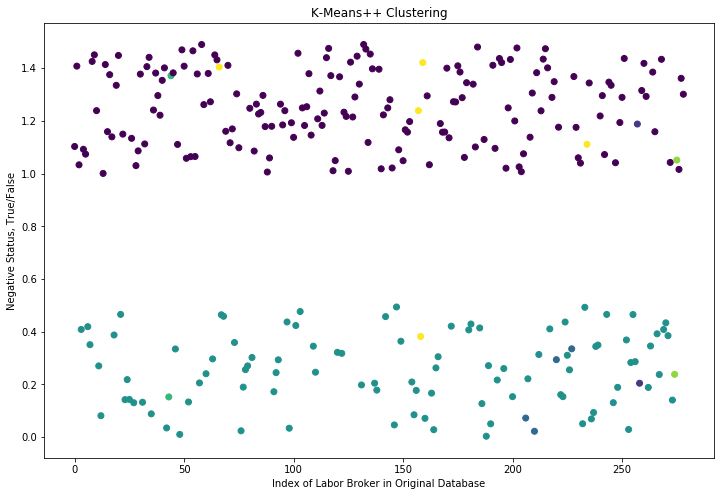

In [226]:
# create a kmeans clustering model with 18 clusters
kmeans = KMeans(init='k-means++', n_clusters = 7, n_init = 7)
kmeans_fit = kmeans.fit_predict(feature_vectors.as_matrix())

# plot the kmeans clustering result
fig, ax = plt.subplots(figsize = (12,8))
plt.title('K-Means++ Clustering')
plt.xlabel('Index of Labor Broker in Original Database')
plt.ylabel('Negative Status, True/False')
_ = plt.scatter([i for i in range(len(feature_vectors))], [i + random()/2 for i in feature_vectors['Negative Status']], c=kmeans_fit)

In [230]:
for c in kmeans.cluster_centers_:
    if c[-1] > 0.5:
        print(c)

[  1.18343195e-02   5.91715976e-03   5.91715976e-03   5.91715976e-03
   5.91715976e-03   1.18343195e-02   1.18343195e-02   1.73472348e-18
   5.91715976e-03   1.18343195e-02   1.18343195e-02   1.18343195e-02
   1.18343195e-02   1.18343195e-02   1.18343195e-02   1.18343195e-02
   5.91715976e-03   1.18343195e-02   1.18343195e-02   5.91715976e-03
   1.18343195e-02   5.91715976e-03   1.18343195e-02   1.18343195e-02
   1.18343195e-02   1.18343195e-02   1.18343195e-02   1.73472348e-18
   1.18343195e-02   1.18343195e-02   1.73472348e-18   1.18343195e-02
   1.18343195e-02   8.67361738e-18   1.18343195e-02   1.18343195e-02
   1.18343195e-02   1.18343195e-02   1.73472348e-18   5.91715976e-03
   1.73472348e-18   5.91715976e-03   1.18343195e-02   1.73472348e-18
   1.73472348e-18   1.18343195e-02   1.73472348e-18   2.95857988e-02
   1.18343195e-02   5.91715976e-03   1.73472348e-18   5.91715976e-03
   1.18343195e-02   1.18343195e-02   5.91715976e-03   1.18343195e-02
   1.18343195e-02   5.91715976e-03

In [239]:
for c in kmeans.cluster_centers_:
    if c[-1] > 0.5:
        print(np.where(c > 0.2)[0])
        print(np.asarray(cols + ['Negative Status'])[np.where(c > 0.2)[0]])

[199]
['Negative Status']
[ 27  71 179 199]
['RECRAA BLDG VITALEZ COMPOUND SUCAT PARA#AQUE M.M.'
 'CAPT ROSENDO C HERRERA' 'oriman@oriental.com.ph' 'Negative Status']


In [245]:
c = kmeans.cluster_centers_[-1]
ownership_groups = np.asarray(cols + ['Negative Status'])[np.where(c > 0.2)[0]]
i = 0
for index, row in dataframe.iterrows():
    for og in list(ownership_groups):
        if og in list(row.values):
            print(row['Negative Status'])
            break
    i += 1

True
False
True
False
True
True


In [ ]:
'''
I am done trying to find ownership groups with the greatest number of violations by clustering.
Now I am going to do brute force find them with sums.
'''

In [254]:
number_of_violations = {}
ownership_groups = [i for i in address_sum if (address_sum[i] > 1 and i is not None)] + [i for i in reps_sum if (reps_sum[i] > 1 and i is not None)] + [i for i in phone_sum if (phone_sum[i] > 1 and i is not None)] + [i for i in email_sum if (email_sum[i] > 1 and i is not None)] + [i for i in website_sum if (website_sum[i] > 1 and i is not None)]

for index, row in dataframe.iterrows():
    if row['Negative Status'] == True:
        for field in row:
            if field in ownership_groups:
                if field in number_of_violations:
                    number_of_violations[field] += 1
                else:
                    number_of_violations[field] = 1       

In [261]:
sorted_violations = [(k, number_of_violations[k]) for k in sorted(number_of_violations, key = number_of_violations.get, reverse = True)]
ownership_groups_df = pd.DataFrame(data = sorted_violations, columns = ['Ownership Group', 'Number of Violations'])
ownership_groups_df

,Ownership Group,Number of Violations
0,MS ANGELINA T RIVERA,5
1,CAPT ROSENDO C HERRERA,4
2,MR REGINALDO A OBEN,3
3,MR AKIRA S KATO,3
4,MR CESAR P CARANDANG,3
5,MR BONIFACIO F GOMEZ,3
6,"RM 202 2F KIMVI BLDG 1191 MA OROSA ST ERMITA, ...",2
7,ims_3r@yahoo.com,2
8,MR ROLANDO P MALIG,2
9,886870 / 8163199,2


In [262]:
ownership_groups_df.to_csv(path_or_buf = 'ownership groups and their violations.csv', sep=',', index = False, header = True)

Above, we see the contact information that is associate with multiple labor brokers -- indicating multiple labor brokers are associated with the same "ownership group" that uses this contact information -- and the number of labor violations that are associated with this contact information. We see that the official representative "MS ANGELINA T RIVERA" is associated with 5 license violations, and the official representative "CAPT ROSENDO C HERRERA" is associated with 4 license violations.